# Análise Exploratoria dos dados

## 1. Importações

In [1]:
import pandas             as pd
import numpy              as np
import seaborn            as sns
import matplotlib.pyplot  as plt
from IPython.display import Markdown
from IPython.core.display import HTML

## 2. Importando dataset inicial

In [2]:
# read dataset
df = pd.read_csv("../dataset/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 3. Significado de cada coluna

| Nome_Coluna        | Tradução                   | Descrição                                                                 |
|--------------------|----------------------------|---------------------------------------------------------------------------|
| `id`               | ID                         | Identificador único do imóvel                                             |
| `date`             | Data da Venda              | Data em que o imóvel foi vendido                                         |
| `price`            | Preço                      | Valor de venda do imóvel (em dólares)                                    |
| `bedrooms`         | Quartos                    | Número de quartos no imóvel                                              |
| `bathrooms`        | Banheiros                  | Número de banheiros no imóvel (pode ter valores fracionários)            |
| `sqft_living`      | Área Interna (m²)          | Área útil interna do imóvel em metros quadrados                          |
| `sqft_lot`         | Área do Terreno (m²)       | Área total do terreno em metros quadrados                                |
| `floors`           | Andares                    | Número de andares                                                         |
| `waterfront`       | Frente para Água           | 1 se o imóvel tem vista para a água (lago/mar), 0 caso contrário          |
| `view`             | Visão Panorâmica           | Nível de vista do imóvel (0 a 4, quanto maior, melhor a vista)            |
| `condition`        | Condição                   | Condição geral do imóvel (1 a 5, onde 5 é excelente)                      |
| `grade`            | Qualidade de Construção    | Classificação da construção com base em design e materiais (1 a 13)       |
| `sqft_above`       | Área Acima do Solo (m²)    | Área da casa acima do nível do solo em metros quadrados                   |
| `sqft_basement`    | Área do Porão (m²)         | Área do porão em metros quadrados                                        |
| `yr_built`         | Ano de Construção          | Ano em que o imóvel foi construído                                       |
| `yr_renovated`     | Ano da Reforma             | Ano em que o imóvel foi reformado (0 se nunca foi reformado)             |
| `zipcode`          | CEP                        | Código postal da região do imóvel                                        |
| `lat`              | Latitude                   | Latitude geográfica do imóvel                                            |
| `long`             | Longitude                  | Longitude geográfica do imóvel                                           |
| `sqft_living15`    | Área Interna Média Vizinhos (m²) | Área média útil das 15 casas mais próximas, em metros quadrados   |
| `sqft_lot15`       | Área do Terreno Média Vizinhos (m²) | Área média do terreno das 15 casas mais próximas, em metros quadrados |

## 4. Transformação dos dados inicial

In [3]:
# Modificações iniciadas  no arquivo 01_Analise_inicial_house_rocket.ipynb:

# transforma as a variavel date de object para date
df['date'] = pd.to_datetime(df['date'])

# remover colunas desnecessarias
df.drop(columns=['sqft_living15','sqft_lot15'], inplace=True)

# substituir o valor bedrooms por 3 parece um erro de digitação
df.loc[df['bedrooms'] == 33, 'bedrooms'] = 3

# converter sqft para metros quadrados  pés quadrados para metros quadrados (1 ft² = 0.09290304 m²).
cols_to_convert = ['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_above']
for col in cols_to_convert:
    df[col] = df[col].apply(lambda x: round(x * 0.09290304, 2))
    
# renomear as colunas 
df.rename(columns = {'id': 'id', 'date': 'data_venda', 'price':'preco', 'bedrooms':'quartos', 'bathrooms':'banheiros',
                          'sqft_living': 'm2_construido_total','sqft_lot':'m2_terreno_total', 'floors':'andares', 'waterfront':'beira-mar',
                          'view':'vista_geral', 'condition':'condicao', 'grade':'nivel_construcao','sqft_above':'m2_construidos_chao',
                          'sqft_basement':'m2_porao', 'yr_built':'ano_construído', 'yr_renovated':'ano_reformado', 'zipcode':'cep',
                          'lat':'latitude', 'long':'longitude'}, inplace=True)
# verificar duplicadas
duplicatas = df[df.duplicated(subset=['id', 'data_venda'], keep=False)]
print(f"Número de duplicatas: {duplicatas.shape[0]}")

df.head()


Número de duplicatas: 0


,id,data_venda,preco,quartos,banheiros,m2_construido_total,m2_terreno_total,andares,beira-mar,vista_geral,condicao,nivel_construcao,m2_construidos_chao,m2_porao,ano_construído,ano_reformado,cep,latitude,longitude
0,7129300520,2014-10-13,221900.0,3,1.00,109.63,524.90,1.0,0,0,3,7,109.63,0.00,1955,0,98178,47.5112,-122.257
1,6414100192,2014-12-09,538000.0,3,2.25,238.76,672.80,2.0,0,0,3,7,201.60,37.16,1951,1991,98125,47.7210,-122.319
2,5631500400,2015-02-25,180000.0,2,1.00,71.54,929.03,1.0,0,0,3,6,71.54,0.00,1933,0,98028,47.7379,-122.233
3,2487200875,2014-12-09,604000.0,4,3.00,182.09,464.52,1.0,0,0,5,7,97.55,84.54,1965,0,98136,47.5208,-122.393
4,1954400510,2015-02-18,510000.0,3,2.00,156.08,750.66,1.0,0,0,3,8,156.08,0.00,1987,0,98074,47.6168,-122.045


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   21613 non-null  int64         
 1   data_venda           21613 non-null  datetime64[ns]
 2   preco                21613 non-null  float64       
 3   quartos              21613 non-null  int64         
 4   banheiros            21613 non-null  float64       
 5   m2_construido_total  21613 non-null  float64       
 6   m2_terreno_total     21613 non-null  float64       
 7   andares              21613 non-null  float64       
 8   beira-mar            21613 non-null  int64         
 9   vista_geral          21613 non-null  int64         
 10  condicao             21613 non-null  int64         
 11  nivel_construcao     21613 non-null  int64         
 12  m2_construidos_chao  21613 non-null  float64       
 13  m2_porao             21613 non-

## 5. Exploração dos dados

**O que fazer:**

- Verificar Atributos
- Criar tabela da estatística Descritiva
- Criar tabelas diversas
- Pensar em Hipóteses.
- Testar as Hipóteses.

## 5.1. Separação dos atributos

In [5]:
#Separação das variáveis numéricas e categóricas
num_atributos = df.select_dtypes(include = ['int64', 'float64'])
cat_atributos = df.select_dtypes(include = ['object'])

In [6]:
display(Markdown("### Variáveis numéricas"))
num_atributos.nunique()


### Variáveis numéricas

id                     21436
preco                   4028
quartos                   12
banheiros                 30
m2_construido_total     1038
m2_terreno_total        9782
andares                    6
beira-mar                  2
vista_geral                5
condicao                   5
nivel_construcao          12
m2_construidos_chao      946
m2_porao                 306
ano_construído           116
ano_reformado             70
cep                       70
latitude                5034
longitude                752
dtype: int64

#### não  possui variaveis categoricas

## 5.2. Estatística

## 5.2.1 Descriçaõ estatística

In [7]:
df.describe()

,id,data_venda,preco,quartos,banheiros,m2_construido_total,m2_terreno_total,andares,beira-mar,vista_geral,condicao,nivel_construcao,m2_construidos_chao,m2_porao,ano_construído,ano_reformado,cep,latitude,longitude
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.369454,2.114757,193.229021,1403.483190,1.494309,0.007542,0.234303,3.409430,7.656873,166.146897,27.082015,1971.005136,84.402258,98077.939805,47.560053,-122.213896
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,26.940000,48.310000,1.000000,0.000000,0.000000,1.000000,1.000000,26.940000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,132.570000,468.230000,1.000000,0.000000,0.000000,3.000000,7.000000,110.550000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,177.440000,707.740000,1.500000,0.000000,0.000000,3.000000,7.000000,144.930000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,236.900000,992.950000,2.000000,0.000000,0.000000,4.000000,8.000000,205.320000,52.030000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,11.000000,8.000000,1257.910000,153416.270000,3.500000,1.000000,4.000000,5.000000,13.000000,874.220000,447.790000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000
std,2.876566e+09,NaN,3.671272e+05,0.907964,0.770163,85.325990,3848.091398,0.539989,0.086517,0.766318,0.650743,1.175459,76.932242,41.116452,29.373411,401.679240,53.505026,0.138564,0.140828


## 5.2.2 Visão geral por Histograma

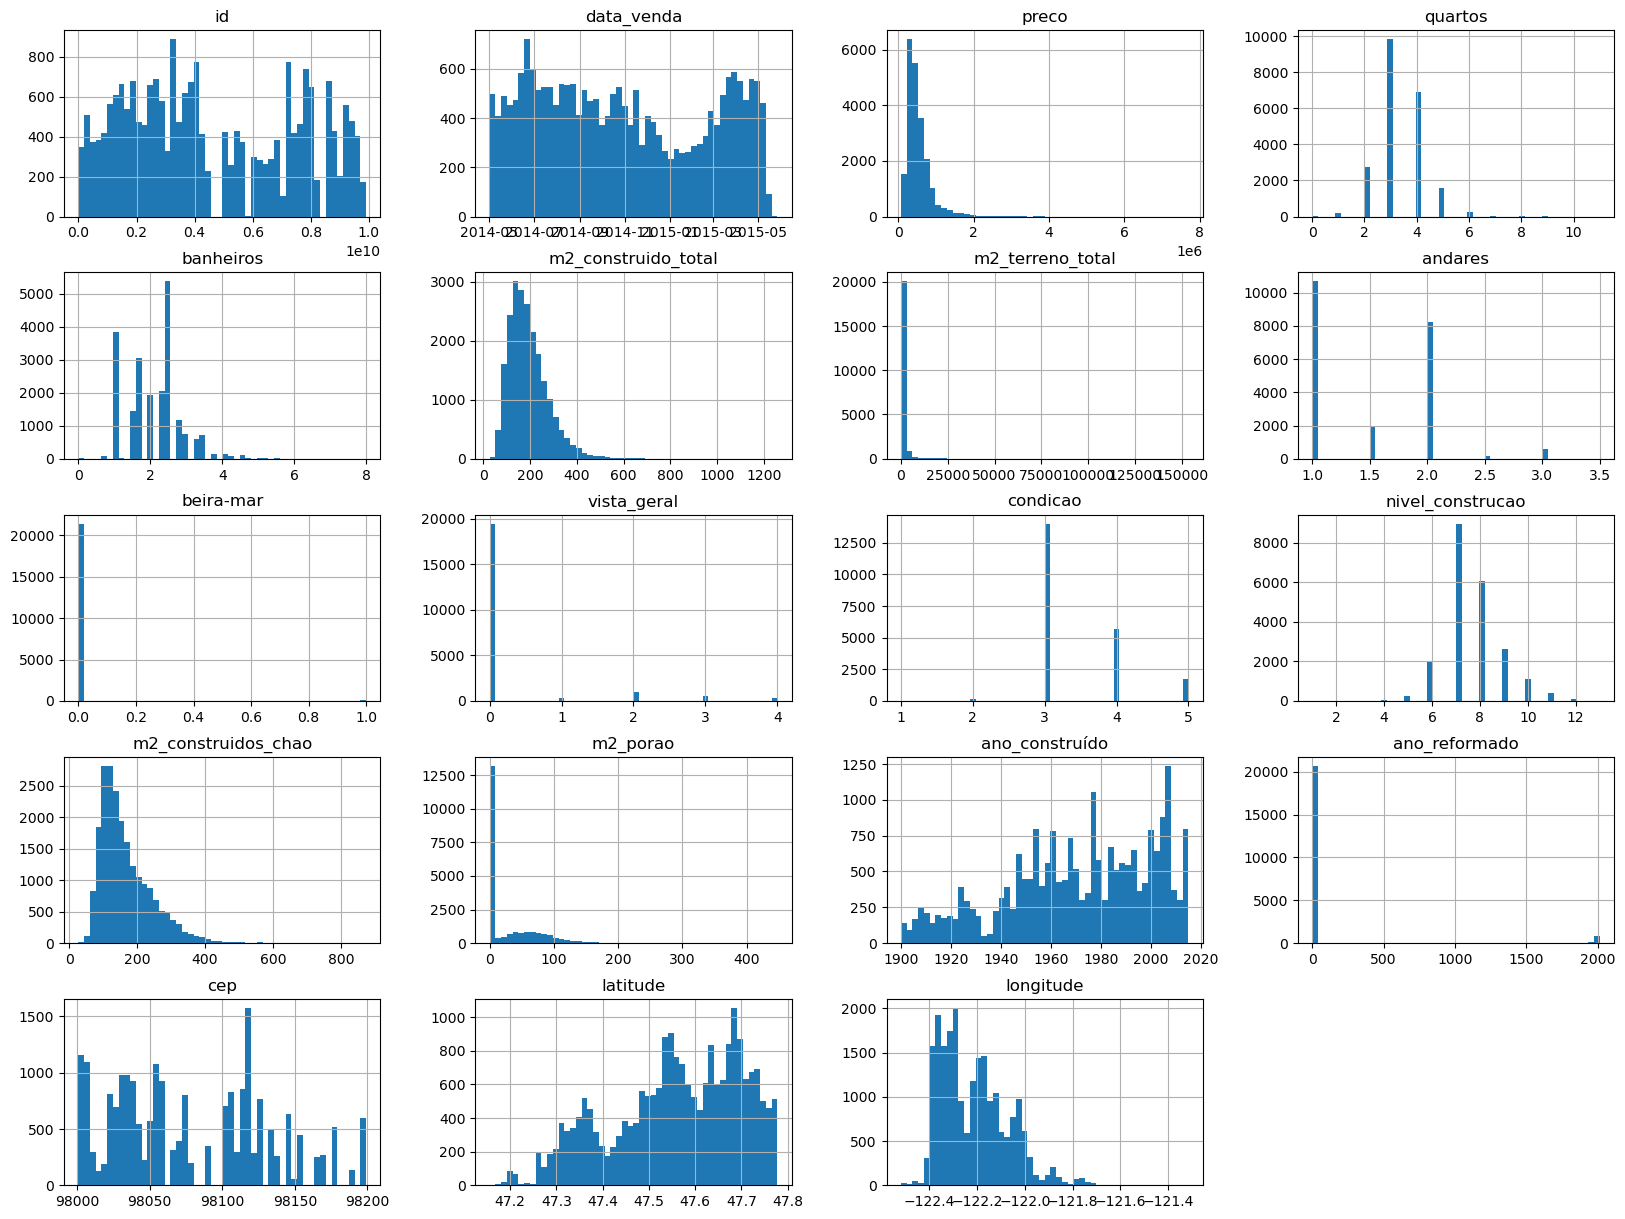

In [8]:
%matplotlib inline 
df.hist(bins=50, figsize=(20,15))
plt.show()

## 5.2.4 Dicionario 

In [12]:
import pandas as pd

# Dicionário de dados com tipo e subtipo conforme estatística descritiva
dicionario = [
    ['id', 'Identificador único do imóvel', 'quantitativa', 'contínua'],
    ['data_venda', 'Data em que o imóvel foi vendido', 'qualitativa', 'ordinal'],
    ['preco', 'Preço de venda do imóvel (em dólares)', 'quantitativa', 'contínua'],
    ['quartos', 'Número de quartos no imóvel', 'quantitativa', 'discreta'],
    ['banheiros', 'Número de banheiros no imóvel', 'quantitativa', 'contínua'],
    ['m2_construido_total', 'Área construída total em metros quadrados', 'quantitativa', 'contínua'],
    ['m2_terreno_total', 'Área total do terreno em metros quadrados', 'quantitativa', 'contínua'],
    ['andares', 'Número de andares do imóvel', 'quantitativa', 'discreta'],
    ['beira-mar', '1 se o imóvel tem frente para água, 0 caso contrário', 'qualitativa', 'nominal'],
    ['vista_geral', 'Nível de vista geral do imóvel (0 a 4)', 'qualitativa', 'ordinal'],
    ['condicao', 'Condição geral do imóvel (1 a 5)', 'qualitativa', 'ordinal'],
    ['nivel_construcao', 'Classificação da construção (1 a 13)', 'qualitativa', 'ordinal'],
    ['m2_construidos_chao', 'Área construída acima do solo (m²)', 'quantitativa', 'contínua'],
    ['m2_porao', 'Área do porão (m²)', 'quantitativa', 'contínua'],
    ['ano_construído', 'Ano em que o imóvel foi construído', 'quantitativa', 'discreta'],
    ['ano_reformado', 'Ano da última reforma (0 se nunca reformado)', 'quantitativa', 'discreta'],
    ['cep', 'Código postal da localização do imóvel', 'qualitativa', 'nominal'],
    ['latitude', 'Latitude geográfica do imóvel', 'quantitativa', 'contínua'],
    ['longitude', 'Longitude geográfica do imóvel', 'quantitativa', 'contínua']
]

# Criar DataFrame
data_dictionary = pd.DataFrame(dicionario, columns=['Variável', 'Descrição', 'Tipo', 'Subtipo'])



# salvar como CSV
data_dictionary.to_csv('../dataset/dicionario_dados_imoveis_completo.csv', index=False)


In [13]:
data_dictionary

,Variável,Descrição,Tipo,Subtipo
0,id,Identificador único do imóvel,quantitativa,contínua
1,data_venda,Data em que o imóvel foi vendido,qualitativa,ordinal
2,preco,Preço de venda do imóvel (em dólares),quantitativa,contínua
3,quartos,Número de quartos no imóvel,quantitativa,discreta
4,banheiros,Número de banheiros no imóvel,quantitativa,contínua
5,m2_construido_total,Área construída total em metros quadrados,quantitativa,contínua
6,m2_terreno_total,Área total do terreno em metros quadrados,quantitativa,contínua
7,andares,Número de andares do imóvel,quantitativa,discreta
8,beira-mar,"1 se o imóvel tem frente para água, 0 caso con...",qualitativa,nominal
9,vista_geral,Nível de vista geral do imóvel (0 a 4),qualitativa,ordinal


## 5.2.5 Correlação

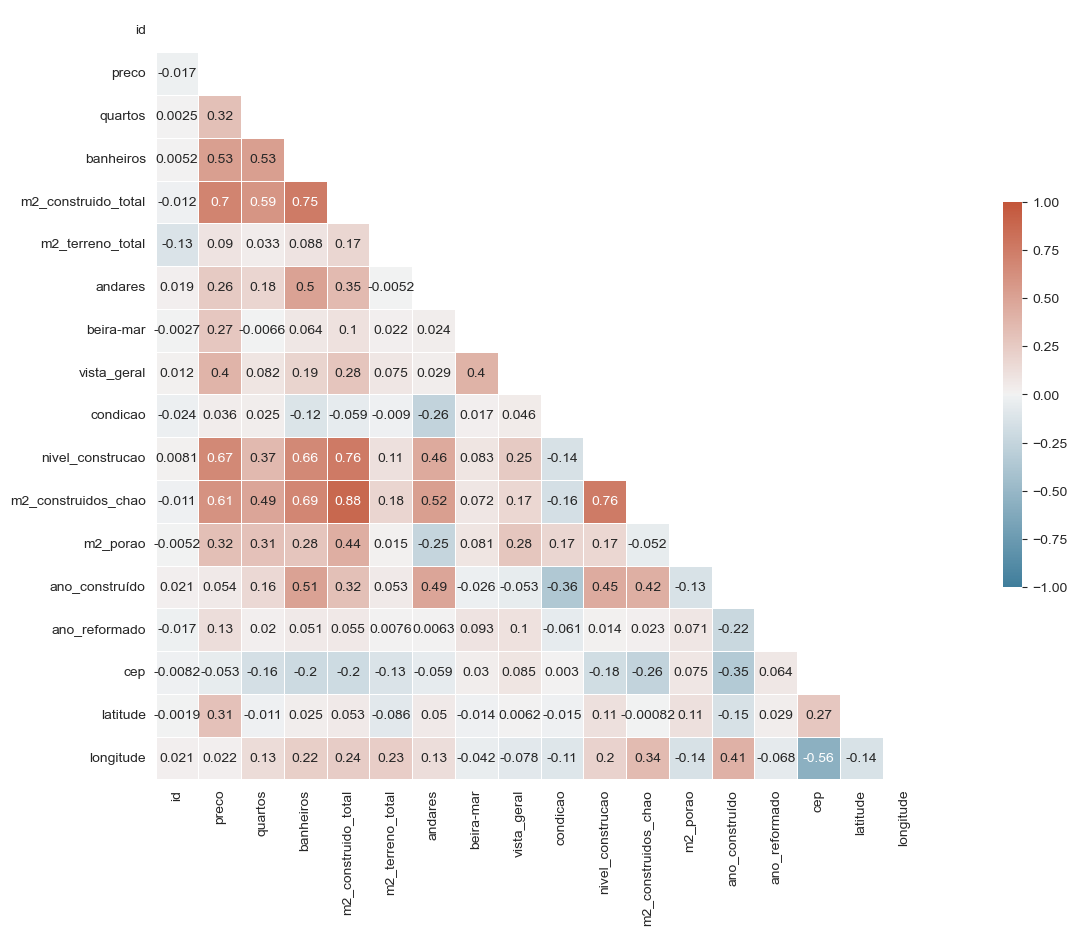

In [15]:
corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")

f, ax = plt.subplots(figsize=(20, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

chart = sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    ax=ax, annot=True
)
plt.show()

<Axes: >

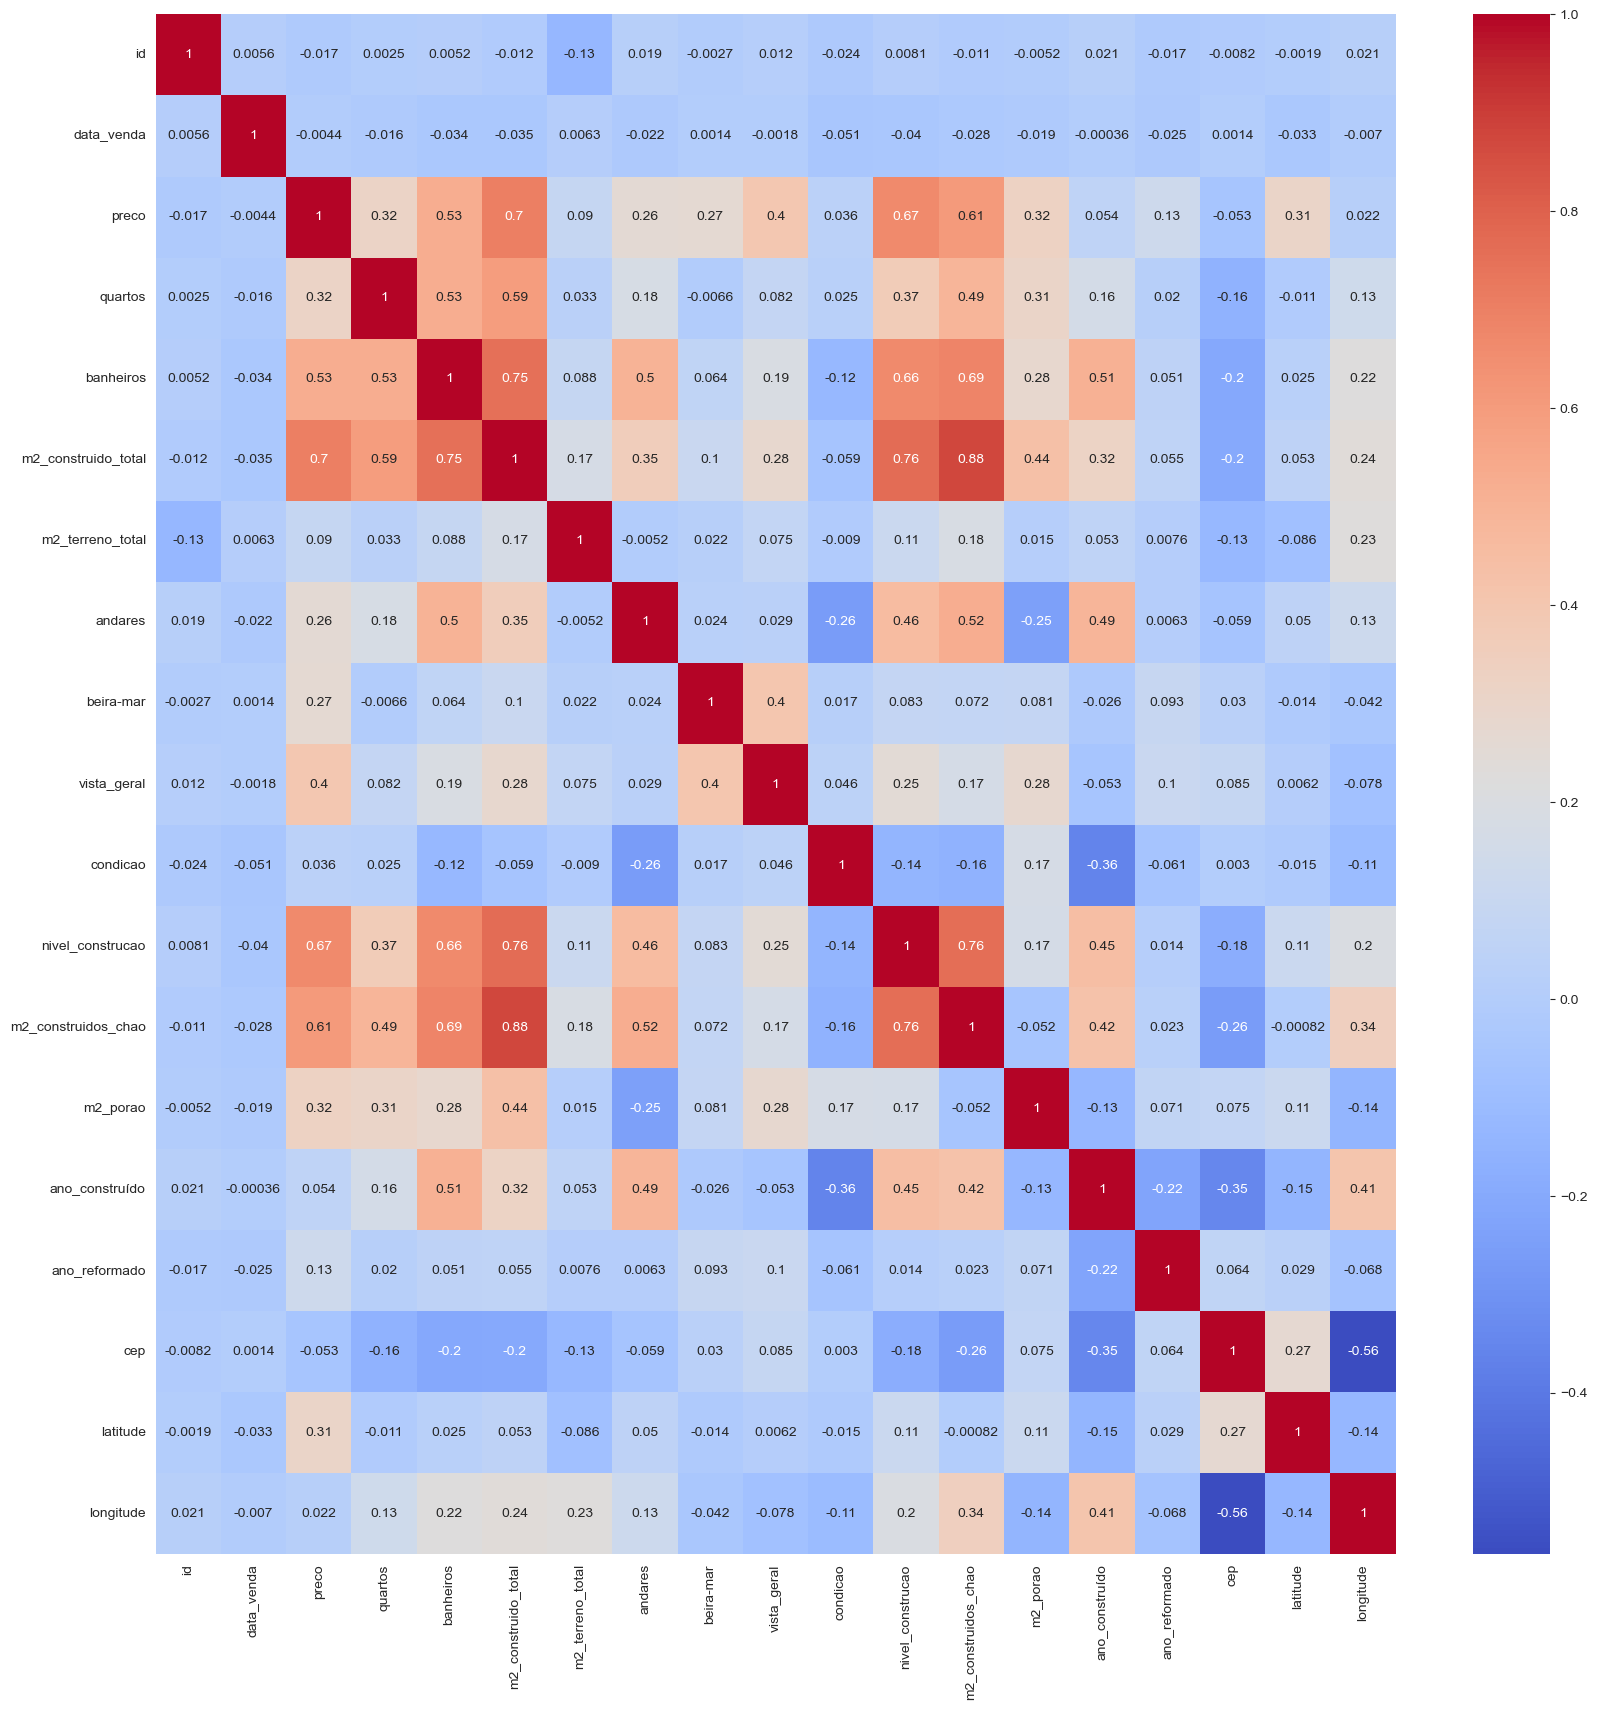

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## 6. Negócio e hipoteses

## 6.1. Perguntaas de negócio

### N1: Quais são os melhores imóveis e por quanto comprar?

### N2: Qual o melhor período de venda dos imóveis e por quanto vender?

**Para entender o melhor período de compra e venda devemos olhar para os atributos selecionados:**

1. Sazonalidade (4 Estações do ano).
2. Valor dos imóveis próximos.
3. Qualidade do Imóvel.
4. Vista do Imóvel.

## 6.2. Hipóteses a serem exploradas

**H1: Imóveis que possuem vista para água são 30% mais caros, na média.**

**H2: Imóveis com data de construção menor do que 1955, são 50% mais baratos, na média.**

**H3: Imóveis sem porão possuem m2_construcao_total 50% maiores do que com porão, na média.**

**H4: O Crescimento do preço dos imóveis YoY (Year over Year) é de 10%.**

**H5: Imóveis com 3 banheiros tem um crescimento no Preço MoM (Month of Month) de 15%.**

**H6: Imóveis no inverno são 20% mais baratos do que o resto do ano.**

**H7: Pelo menos 80% dos imóveis com condição 4 e 5 tem níveis de construção 7 ou mais.**

**H8: Pelo menos 80% dos imóveis com vista para água possuem nível de construção 10 ou mais.**

In [ ]:
## 7. Feat